In [ ]:
# @title Loading data

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Colab Notebooks/lorenz_long.csv'

import pandas as pd
import numpy as np
data = pd.read_csv(file_path, header=None)
data = np.array(data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data shape: (1050000, 3)


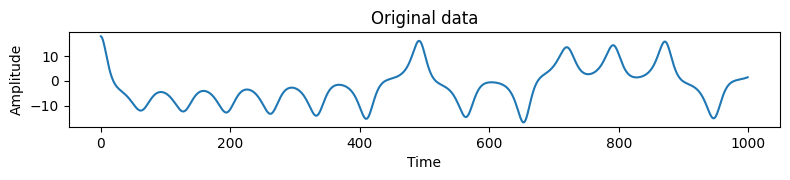

(1050000, 3)


In [ ]:
# @title Data reshaping

import matplotlib.pyplot as plt
import scipy.stats
import scipy.signal
import datetime
import networkx as nx
import csv


print('Data shape:',data.shape)

#######
# Visualization

plt.figure(figsize=(8, 3))
plt.subplot(2, 1, 1)
plt.plot(data[:1000,0])
plt.title('Original data')
plt.xlabel('Time')
plt.ylabel('Amplitude')


plt.tight_layout()
plt.show()

print(data.shape)

In [ ]:
import numpy as np

def minimally_overlapping_split(data, window_size):

    """
    Parameters:
        data.shape = (time_steps, dim)

    Returns:
        shape = (num_segments, window_size, dim)
    """

    data = np.asarray(data)
    if data.ndim == 1:
        data = data[:, np.newaxis]  # (time_steps,) → (time_steps, 1)

    n, num_features = data.shape
    step_size = window_size
    num_full_windows = n // window_size

    segments = [
        data[i * step_size : i * step_size + window_size, :]
        for i in range(num_full_windows)
    ]

    if n % window_size != 0:
        last_segment = data[-window_size:, :]
        segments.append(last_segment)

    return np.stack(segments)


In [ ]:
window_size = 2000

segments = minimally_overlapping_split(data, window_size)

print(segments.shape)
print(segments[:])
print(data.shape)
print(data)

(525, 2000, 3)
[[[ 17.75895644  16.66863181  41.12538867]
  [ 17.53018032  14.04760577  42.72291915]
  [ 17.06522342  11.27355325  43.76316744]
  ...
  [  1.94361584   3.7162474    8.01920227]
  [  2.12986943   4.08532428   7.88655156]
  [  2.33533598   4.49250314   7.77347569]]

 [[  2.56198846   4.94144911   7.68285617]
  [  2.81197179   5.43604849   7.61821555]
  [  3.08760575   5.98036738   7.58384441]
  ...
  [  0.65988945   1.24594112  14.9914982 ]
  [  0.71936535   1.32414441  14.60575225]
  [  0.78110309   1.41235903  14.23154071]]

 [[  0.84586993   1.51121817  13.86878035]
  [  0.91442561   1.62146521  13.51743453]
  [  0.98753396   1.74396078  13.17752001]
  ...
  [ -9.73173553 -16.51469552  17.04087449]
  [-10.41993707 -17.38754835  18.27905211]
  [-11.12215767 -18.18134308  19.68994717]]

 ...

 [[ 15.57513953   9.94817441  41.48447727]
  [ 14.93409074   7.7774565   41.72746298]
  [ 14.15223835   5.71740332  41.59726029]
  ...
  [  7.57377297  12.4159352   16.72068495]
  [

In [ ]:
np.save("/content/drive/My Drive/Colab Notebooks/lorenz3dim_segments.npy", segments)
